In [1]:
import pandas as pd

import gc # To collect garbage values generated during running

import matplotlib.pyplot as plt

import numpy as np

import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
series = pd.read_csv('data/SmileOn11.28.2020.csv',header=2, index_col=None, encoding='latin-1' )

In [4]:
#Dropping columns where null is upto 25000 values
df = series.dropna(axis = 1, thresh = 25000, how = 'all')

In [5]:
column = list(df.columns[1:12])
column.append('Birth Year')
column.append('SMILE ON 60+ Demographic Information - Gender')
column.append('SMILE ON 60+ Treatment Plan - Is the treatment plan completed?')

In [6]:
#Columns that are to be dropped
to_drop = []
for col in list(series.columns):
    if col not in column:
        to_drop.append(col)
        
Drop_Col = to_drop

series = series.drop(Drop_Col, axis = 1)

#series = series.dropna()
series.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40032 entries, 0 to 40031
Data columns (total 14 columns):
 #   Column                                                          Non-Null Count  Dtype  
---  ------                                                          --------------  -----  
 0   ReportVersion                                                   40032 non-null  object 
 1   CallDateAndTimeStart                                            40032 non-null  object 
 2   CallDateAndTimeEnd                                              40032 non-null  object 
 3   CallLength                                                      40032 non-null  int64  
 4   CallerNum                                                       40032 non-null  int64  
 5   PhoneWorkerNum                                                  40032 non-null  int64  
 6   CityName                                                        39404 non-null  object 
 7   CountyName                                       

In [7]:
#Since call length is available , Call time and Date is Not required. However year could be used to calculate Age
series['CallDateAndTimeEnd'] = pd.to_datetime(series['CallDateAndTimeEnd'], format='%m/%d/%Y %H:%M')
series['Year'] = pd.DatetimeIndex(series['CallDateAndTimeEnd']).year

#Cleaning Birth Column
series = series[(series['Birth Year'] != '#NUM!')]
series = series[(series['Birth Year'] != '#VALUE!')]
series['Birth Year'] = series['Birth Year'].astype(str).astype(int)

#Making New column AGE to check response of survey AGE WISE
series['Age']= series['Year']- series['Birth Year']

#Cleaning Column CallerNum where number not available
series = series[(series['CallerNum'] != -1)]
series = series[(series['Age'] > 59)]

In [8]:
series = series.rename(columns= {'SMILE ON 60+ Demographic Information - Gender':'Gender','SMILE ON 60+ Treatment Plan - Is the treatment plan completed?':'Complete/Not'})

In [9]:
series = series.dropna()
series.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16407 entries, 2 to 40029
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   ReportVersion         16407 non-null  object        
 1   CallDateAndTimeStart  16407 non-null  object        
 2   CallDateAndTimeEnd    16407 non-null  datetime64[ns]
 3   CallLength            16407 non-null  int64         
 4   CallerNum             16407 non-null  int64         
 5   PhoneWorkerNum        16407 non-null  int64         
 6   CityName              16407 non-null  object        
 7   CountyName            16407 non-null  object        
 8   StateProvince         16407 non-null  object        
 9   CountryName           16407 non-null  object        
 10  PostalCode            16407 non-null  float64       
 11  Birth Year            16407 non-null  int32         
 12  Gender                16407 non-null  object        
 13  Complete/Not    

In [10]:
#Grouping the data Age, Gender Wise to determine Effect and if there treatment is complete or not
#Keeping Data Only for age group 60-65

Grouping = series.groupby(['CountyName','Age','Gender','Complete/Not'], as_index=False).size()
ic = Grouping[(Grouping['Age'] <=80)]
ic.to_csv("Smile_Cleaned.csv")
print(ic.head(30))

   CountyName  Age  Gender Complete/Not  size
0    Anderson   60  Female           No     1
1    Anderson   60    Male           No     3
2    Anderson   61  Female           No     2
3    Anderson   61  Female          Yes     3
4    Anderson   63  Female           No     7
5    Anderson   63  Female          Yes     4
6    Anderson   63    Male           No     3
7    Anderson   64  Female          Yes     1
8    Anderson   65  Female           No     2
9    Anderson   66  Female           No     2
10   Anderson   66  Female          Yes     1
11   Anderson   67  Female           No     3
12   Anderson   73  Female           No     3
13   Anderson   73  Female          Yes     1
14   Anderson   73    Male           No     4
15   Anderson   73    Male          Yes     3
16    Bedford   60  Female           No     3
17    Bedford   61  Female           No     1
18    Bedford   61    Male           No     2
19    Bedford   61    Male          Yes     2
20    Bedford   62    Male        

    Age Complete/Not  size
0    60           No   539
1    60          Yes   146
2    61           No  1098
3    61          Yes   386
4    62           No  1052
5    62          Yes   415
6    63           No  1046
7    63          Yes   439
8    64           No  1082
9    64          Yes   442
10   65           No  1002
11   65          Yes   396


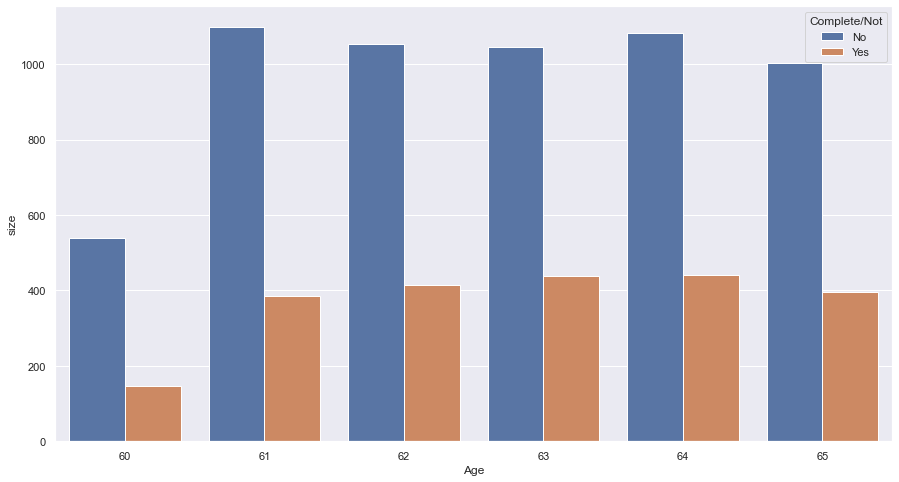

In [11]:
#Grouping the data Age Wise to determine if  treatment is complete or not

Grouping = series.groupby(['Age','Complete/Not'], as_index=False).size()
print(Grouping.head(12))
sns.set(rc={'figure.figsize':(15,8)})
ax = sns.barplot(x="Age", y="size", hue="Complete/Not", data=Grouping[:12], ci=None)

    Age Complete/Not  size
1    60          Yes   146
3    61          Yes   386
5    62          Yes   415
7    63          Yes   439
9    64          Yes   442
11   65          Yes   396
13   66          Yes   284
15   67          Yes   262
17   68          Yes   221
19   69          Yes   179
21   70          Yes   174
23   71          Yes   181


Text(0.5, 1.0, 'Completed Treatment')

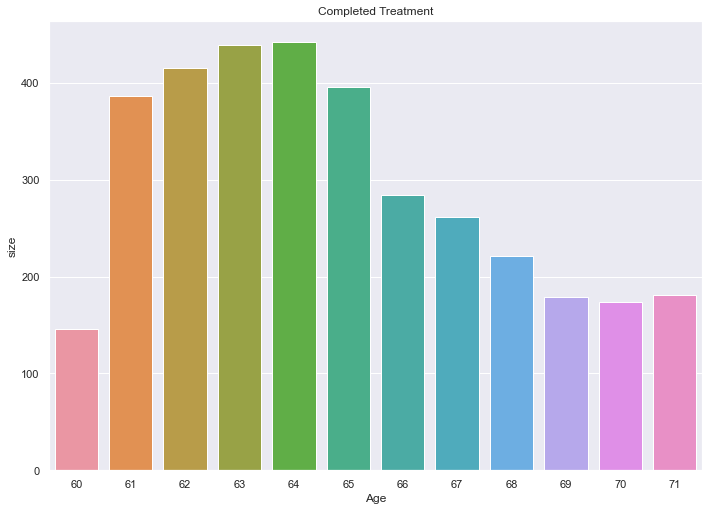

In [12]:
#Completed treatment plan for Age Group 60-65 Gender Wise
Grouping = series.groupby(['Age','Complete/Not'], as_index=False).size()
Completed = Grouping[(Grouping['Complete/Not'] == 'Yes')]
print(Completed.head(12))
sns.set(rc={'figure.figsize':(11.7,8.27)})
ax = sns.barplot(x="Age", y="size", data=Completed[:12], ci=None)
ax.set_title('Completed Treatment')

In [13]:
series['Age'].max()

98

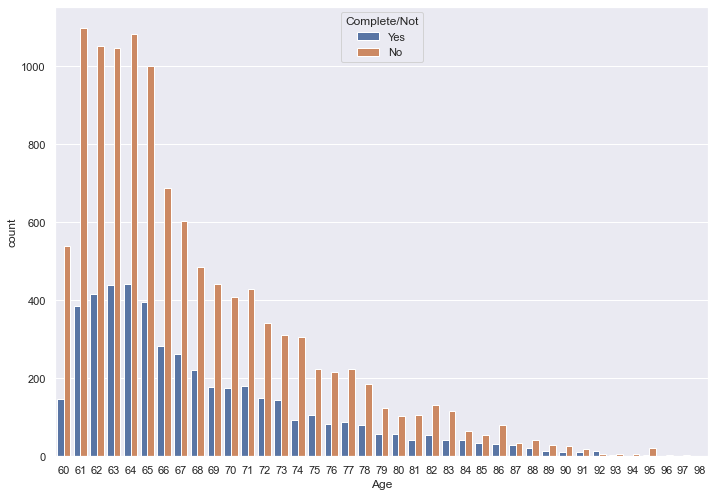

In [14]:
ax = sns.countplot(x="Age", hue="Complete/Not", data=series)


# create a bin =5

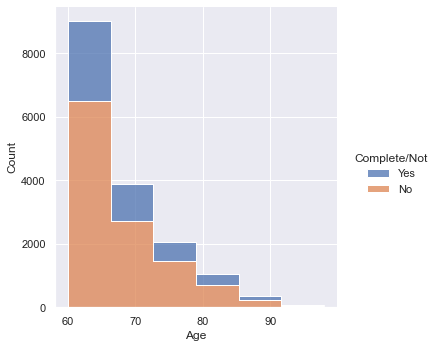

In [15]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
ax = sns.displot(series, x="Age", hue="Complete/Not", multiple="stack",bins=6,element="step")


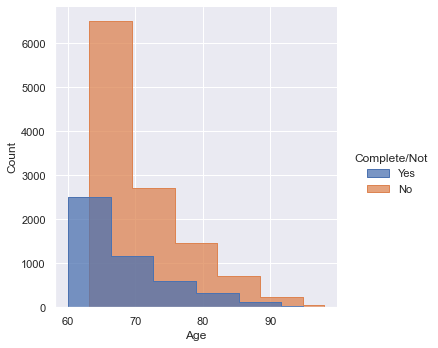

In [20]:
ax = sns.displot(series, x="Age", hue="Complete/Not", multiple="dodge",bins=6,element="step")


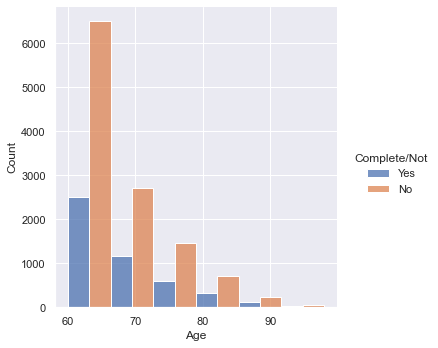

In [24]:
ax = sns.displot(series, x="Age", hue="Complete/Not", multiple="dodge",bins=6,)


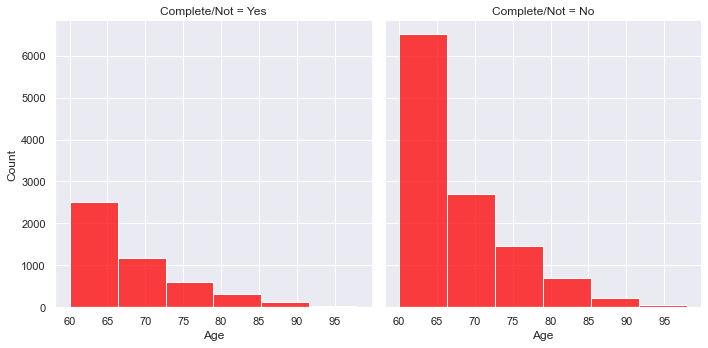

In [25]:
sns.displot(series, x="Age", col="Complete/Not", multiple="dodge",bins=6,color='Red')


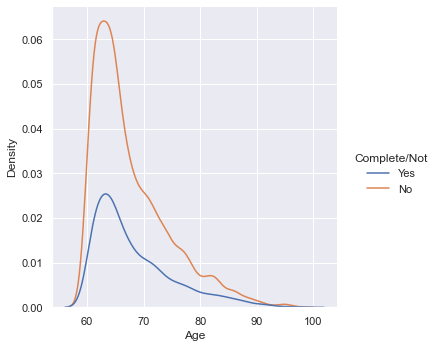

In [56]:
sns.displot(series, x="Age", hue="Complete/Not", kind="kde")


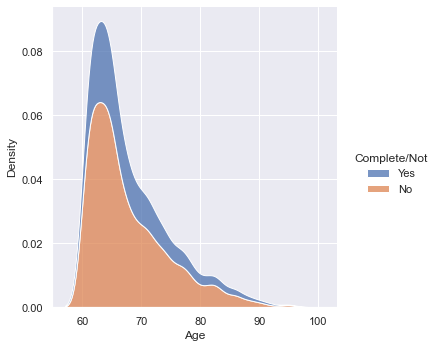

In [57]:
sns.displot(series, x="Age", hue="Complete/Not", kind="kde",multiple= "stack")

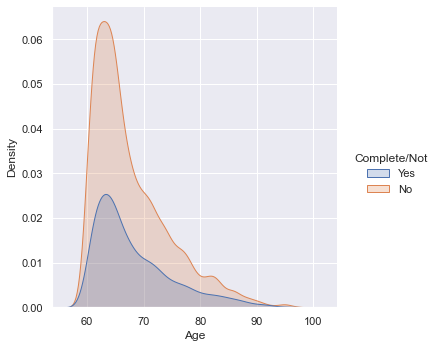

In [70]:
sns.displot(series, x="Age", hue="Complete/Not", kind="kde",fill=True)

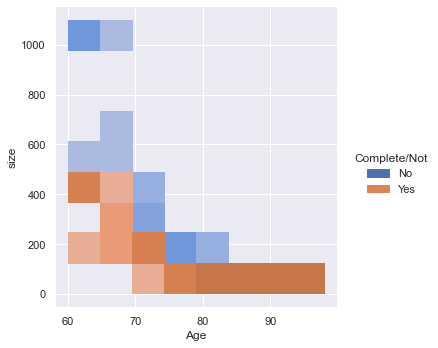

In [61]:
Grouping = series.groupby(['Age','Complete/Not'], as_index=False).size()
sns.displot(Grouping, x="Age", y="size", hue="Complete/Not")


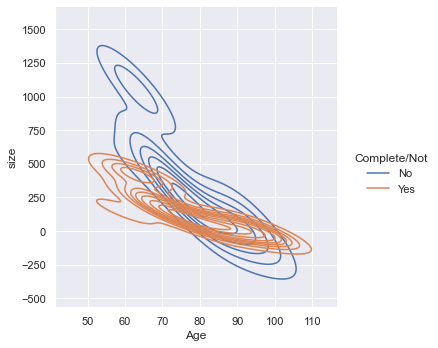

In [63]:
sns.displot(Grouping, x="Age", y="size", hue="Complete/Not", kind="kde")


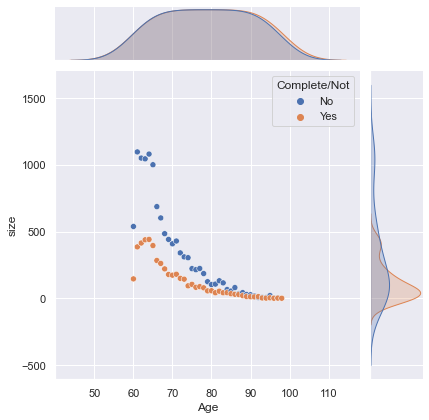

In [68]:
sns.jointplot(data=Grouping, x="Age", y="size",hue="Complete/Not")


    Age Complete/Not  size
0    60           No   539
2    61           No  1098
4    62           No  1052
6    63           No  1046
8    64           No  1082
10   65           No  1002
12   66           No   688
14   67           No   603
16   68           No   485
18   69           No   442
20   70           No   409
22   71           No   430


Text(0.5, 1.0, 'InComplete Treatment')

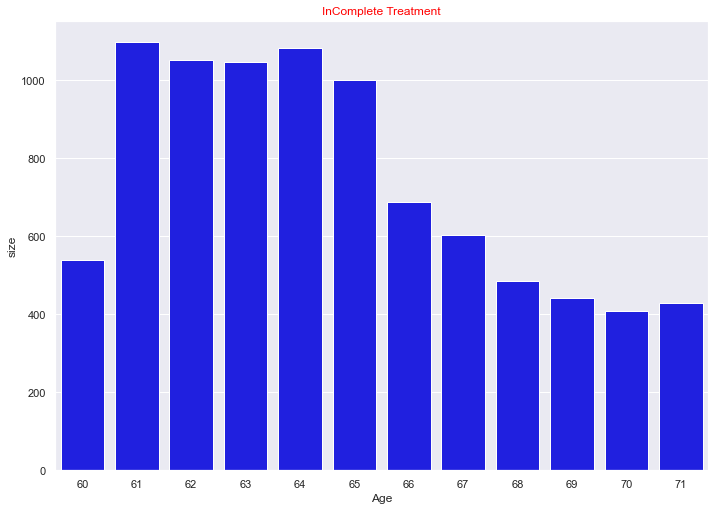

In [22]:
#InComplete treatment plan for Age Group 60-65 Gender Wise
Grouping = series.groupby(['Age','Complete/Not'], as_index=False).size()
InComplete = Grouping[(Grouping['Complete/Not'] == 'No')]
print(InComplete.head(12))
sns.set(rc={'figure.figsize':(11.7,8.27)})
ax = sns.barplot(x="Age", y="size", data=InComplete[:12], ci=None, color='blue')
ax.set_title('InComplete Treatment',color='Red')

     CountyName Complete/Not  size
136      Shelby           No  3096
31     Davidson           No  2431
8       Bradley           No   905
137      Shelby          Yes   878
32     Davidson          Yes   815
130  Rutherford           No   805
142    Sullivan           No   761
143    Sullivan          Yes   624
76         Knox           No   499
157  Washington           No   348


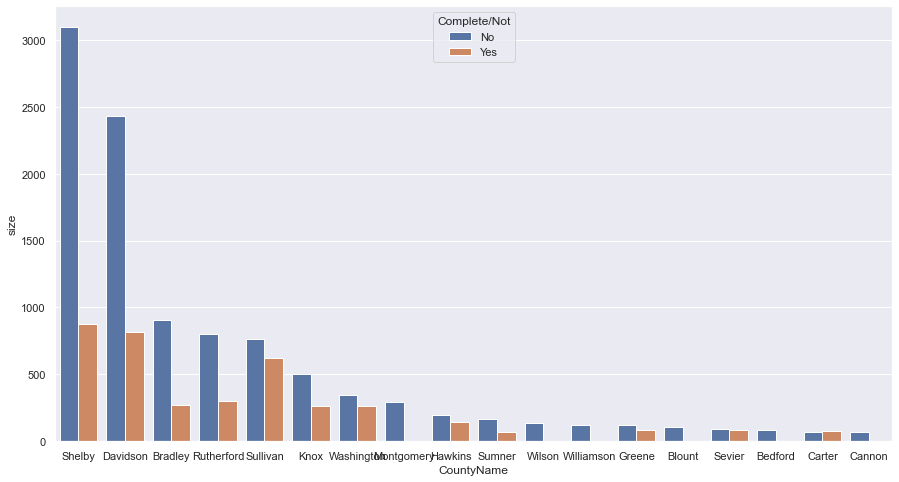

In [23]:
#Grouping the data County Wise to determine Effect and if there treatment is complete or not
#Returns county with maximum response

Grouping = series.groupby(['CountyName','Complete/Not'], as_index=False).size()
Grouping=Grouping.sort_values(by=['size'], ascending= False)
print(Grouping.head(10))
sns.set(rc={'figure.figsize':(15,8)})
ax = sns.barplot(x="CountyName", y="size", hue="Complete/Not", data=Grouping[:30], ci=None)

In [31]:
#Keeping Data Only for age group 60-65
Grouping = series.groupby(['CountyName','Age','Gender','Complete/Not'], as_index=False).size()
ic = Grouping[(Grouping['Age'] <=120)]
print(ic.head(30))

   CountyName  Age  Gender Complete/Not  size
0    Anderson   60  Female           No     1
1    Anderson   60    Male           No     3
2    Anderson   61  Female           No     2
3    Anderson   61  Female          Yes     3
4    Anderson   63  Female           No     7
5    Anderson   63  Female          Yes     4
6    Anderson   63    Male           No     3
7    Anderson   64  Female          Yes     1
8    Anderson   65  Female           No     2
9    Anderson   66  Female           No     2
10   Anderson   66  Female          Yes     1
11   Anderson   67  Female           No     3
12   Anderson   73  Female           No     3
13   Anderson   73  Female          Yes     1
14   Anderson   73    Male           No     4
15   Anderson   73    Male          Yes     3
16    Bedford   60  Female           No     3
17    Bedford   61  Female           No     1
18    Bedford   61    Male           No     2
19    Bedford   61    Male          Yes     2
20    Bedford   62    Male        